##### Notes:
1) First plot set for figure 22 actually hasn't yet seen the dxy/sigma cut, so this cannot explain the difference between my plots and the results in the paper.

2) Negative values for sigma set above 0.1 (not sure how exactly how close you can go, but 0.125 is already too big).

3) Pythia outputs mm

4) Changed generation for B physics models so that only tracks that would be included in the isolation calculation are saved

In [1]:
from vhepmc_evt_parser import data_set
import CMS_analysis as ana
import cms_plotter as cms_plt
import matplotlib.pyplot as plt
import physics as phys
import vmath as vm
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sigma = 0.1

#Note that setting sigma above 0.1 results in negative values results in lower efficiency
#in simulation than seen experimentally. 

In [4]:
#Load a data set - lifetime generations are included below
my_set = data_set()
my_set.set_parent(parent_pid = 999999)
my_set.set_decay_options(np.array([11,13,211]))
my_set.fill_saved("../data_arrays/events_CMS_card-cms-m8-ct10_mm05_big_set.npy")
dpB, muB, amuB, tracksB, jetsB = ana.prep_dataset(my_set)

Fill saved: --- 0.06594347953796387 seconds ---


### Print the number of dark particles included in this simulation

In [5]:
print(dpB.size())

400000


### Print analysis cut choices

In [6]:
ana.list_choices()

Set filter by inputting an array of choices
Event:0:L1T_cut
Event:1:HLT_lxy_cut
Pair:2:HLT_iso_cut
Pair:3:HLT_dphi_muonsDV_cut
Pair:4:HLT_dphi_muons_cut
Pair:5:HLT_pileup_cut
Pair:6:HLT_dxy_cut


### Settings for efficiency plot from CMS paper fig 22

In [7]:
cuts = np.array([True, True, False, False, False, False, False])
lxy_edges = np.array([0., 2., 10., 24., 31., 110.])
pT_edges = np.array([3., 5., 8., 10., 15., 30., 50.])

In [8]:
final_dpB, final_muB, final_amuB, final_cutB, final_evt_cutB = ana.get_cms_eff(sigma, dpB, muB, amuB, tracksB, jetsB, cuts)

Final: 305282 muon pairs
Ratio: 0.763205
Analyze time: --- 1.116513729095459 seconds ---


In [9]:
min_pTB = np.minimum(final_muB.pT, final_amuB.pT)
lxy_divsB = cms_plt.get_eff_divs(lxy_edges, phys.lxy(final_muB))
pT_divsB = cms_plt.get_eff_divs(pT_edges, min_pTB)

### Print total and remaining number of remaining muons used in efficiency plots
#### Bins full enough for a good plot ~ at least 100

In [10]:
remB, totsB = cms_plt.get_n_eff(lxy_divsB, pT_divsB, final_evt_cutB)
remB = np.flip(remB, axis=0)
remB = np.flip(remB, axis=0)
print(remB)
print(totsB)

[[10182. 15472. 10276. 23585. 44171.  9008.]
 [ 1905.  2857.  1840.  4019.  6466.  1097.]
 [ 5292.  7656.  4558.  9509. 15201.  2468.]
 [ 4579.  5703.  3099.  6554. 10021.  1530.]
 [ 1523.  1647.   925.  1743.  2598.   377.]]
[[12760. 18796. 12434. 28359. 52873. 10607.]
 [ 2500.  3627.  2317.  4980.  7979.  1371.]
 [ 7002.  9761.  5778. 12066. 19209.  3106.]
 [ 6066.  7472.  4149.  8491. 12942.  1968.]
 [ 2077.  2188.  1232.  2275.  3408.   503.]]


In [11]:
effB = remB/totsB

In [12]:
paper_fig22 = np.array([[0.11, 0.51, 0.7, 0.69, 0.73, 0.72],
                       [0.14, 0.59, 0.7, 0.7, 0.66, 0.68],
                        [0.26, 0.55, 0.67, 0.69, 0.72, 0.66],
                        [0.28, 0.64, 0.71, 0.75, 0.74, 0.71],
                        [0.23, 0.63, 0.71, 0.74, 0.74, 0.68],
                       ])

In [13]:
diffB = effB-paper_fig22

### Recreation of Figure 22. 
Filled entirely with H->Z,Z model where m = 8 and ct = 10.

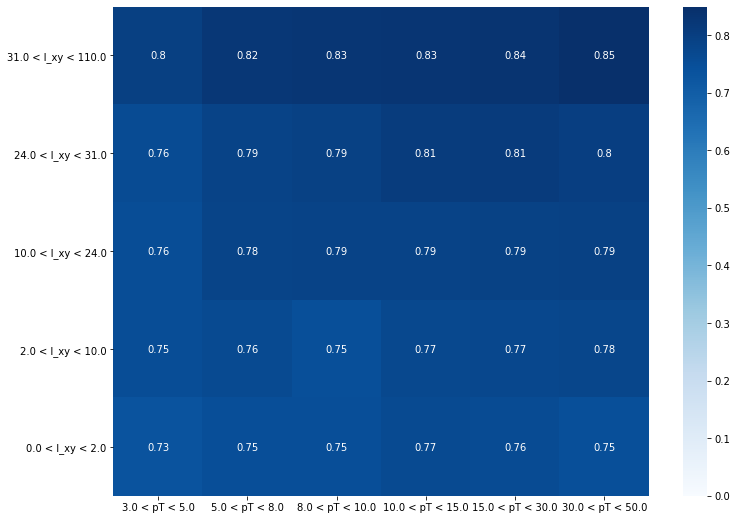

In [14]:
cms_plt.create_eff_plot(lxy_edges, pT_edges, lxy_divsB, pT_divsB, final_evt_cutB, save=True, name="../images/add_fig_22.png")

In [15]:
paper_fig22 = np.array([[0.11, 0.51, 0.7, 0.69, 0.73, 0.72],
                       [0.14, 0.59, 0.7, 0.7, 0.66, 0.68],
                        [0.26, 0.55, 0.67, 0.69, 0.72, 0.66],
                        [0.28, 0.64, 0.71, 0.75, 0.74, 0.71],
                        [0.23, 0.63, 0.71, 0.74, 0.74, 0.68],
                       ])
diffB = effB-paper_fig22

### Difference between my simulated and CMS paper efficiences.

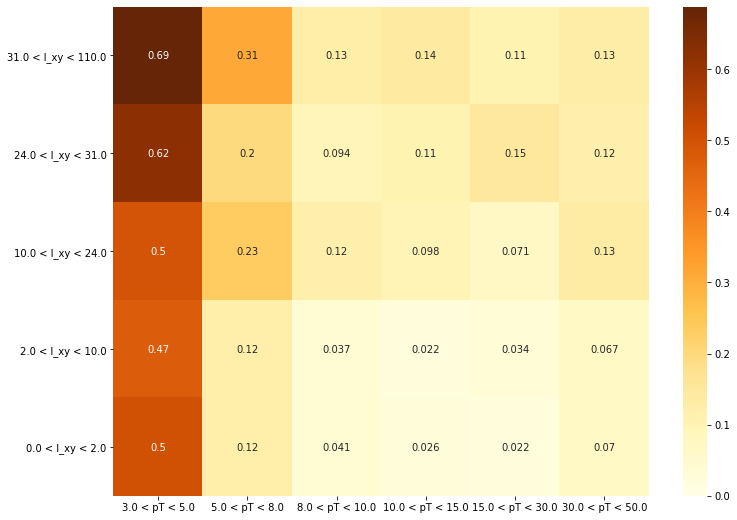

In [16]:
cms_plt.create_eff_plot_v2(lxy_edges, pT_edges, diffB, 2, save=True, name="../images/add_fig_22-diff.png")

In [17]:
lxy_edges = np.array([0., 2., 10., 24., 31., 70., 110.])
pT_edges = np.array([0., 10., 25., 50.])

In [18]:
cuts = np.array([True, True, False, True, True, True, True])
final_dpB, final_muB, final_amuB, final_cutB, final_evt_cutB = ana.get_cms_eff(sigma, dpB, muB, amuB, tracksB, jetsB, cuts)

Final: 260809 muon pairs
Ratio: 0.6520225
Analyze time: --- 1.1629619598388672 seconds ---


In [19]:
final_muB = final_muB.get(final_evt_cutB)
final_amuB = final_amuB.get(final_evt_cutB)
final_cutB = final_cutB[final_evt_cutB]

In [20]:
lxy_divs = cms_plt.get_eff_divs(lxy_edges, phys.lxy(final_muB))
pT_divs = cms_plt.get_eff_divs(pT_edges, phys.comb_pT(final_muB, final_amuB))

In [21]:
remB, totsB = cms_plt.get_n_eff(lxy_divs, pT_divs, final_cutB)
effB = remB/totsB
print(remB)
print(totsB)
print(effB)

[[3.0000e+00 8.4100e+02 1.1774e+04]
 [7.9000e+01 3.8910e+03 2.5911e+04]
 [8.7000e+01 1.6930e+03 7.2170e+03]
 [6.6900e+02 5.5210e+03 1.8445e+04]
 [1.4590e+03 5.4110e+03 1.2623e+04]
 [6.3400e+02 1.2250e+03 1.8620e+03]]
[[4.0000e+00 9.6500e+02 1.3507e+04]
 [9.2000e+01 4.4810e+03 2.9472e+04]
 [1.0600e+02 1.9230e+03 8.1460e+03]
 [7.8400e+02 6.2350e+03 2.0703e+04]
 [1.7340e+03 6.0750e+03 1.4612e+04]
 [9.7000e+02 1.9410e+03 4.0170e+03]]
[[0.75       0.87150259 0.87169616]
 [0.85869565 0.86833296 0.87917345]
 [0.82075472 0.88039522 0.8859563 ]
 [0.85331633 0.88548516 0.89093368]
 [0.84140715 0.89069959 0.863879  ]
 [0.65360825 0.63111798 0.46353   ]]


In [22]:
print(np.sum(totsB))
print(final_muB.size())
print(final_evt_cutB[final_evt_cutB].shape[0])

115767.0
305282
305282


In [25]:
my_set = data_set()
my_set.set_parent(parent_pid = 999999)
my_set.set_decay_options(np.array([11,13,211]))
my_set.fill_saved("../data_arrays/events_B_to_LLP-m4-ct10_mm12_set.npy") 

Fill saved: --- 0.0024819374084472656 seconds ---


In [26]:
dpG, muG, amuG, tracksG, jetsG = ana.prep_dataset(my_set)
print(dpG.size())

10731


In [27]:
cuts = np.array([True, True, True, True, True, True, True]) 
ana.print_cut_selection(cuts)
print()
final_dpG, final_muG, final_amuG, final_cutG, final_evt_cutG = ana.get_cms_eff(sigma, dpG, muG, amuG, tracksG, jetsG, cuts)

Cut choices
True:L1T_cut
True:HLT_lxy_cut
True:HLT_iso_cut
True:HLT_dphi_muonsDV_cut
True:HLT_dphi_muons_cut
True:HLT_pileup_cut
True:HLT_dxy_cut

Final: 9002 muon pairs
Ratio: 0.8388780169602087
Analyze time: --- 9.377791166305542 seconds ---


In [28]:
final_muG = final_muG.get(final_evt_cutG)
final_amuG = final_amuG.get(final_evt_cutG)
final_cutG = final_cutG[final_evt_cutG]

In [29]:
lxy_edges = np.array([0., 2., 10., 24., 31., 70., 110.])
pT_edges = np.array([0., 10., 25., 50.])
lxy_divs = cms_plt.get_eff_divs(lxy_edges, phys.lxy(final_muG))
pT_divs = cms_plt.get_eff_divs(pT_edges, phys.comb_pT(final_muG, final_amuG))

In [30]:
remG, totsG = cms_plt.get_n_eff(lxy_divs, pT_divs, final_cutG)
print(remG)
print(totsG)
effG = remG/totsG
print(effG)

[[ 158.  407.   33.]
 [ 979. 1187.   72.]
 [ 484.  440.   21.]
 [1690. 1112.   23.]
 [1417.  693.   14.]
 [ 144.   43.    0.]]
[[ 164.  442.   41.]
 [1028. 1300.   93.]
 [ 505.  467.   24.]
 [1829. 1239.   36.]
 [1788.  914.   28.]
 [ 372.  122.    3.]]
[[0.96341463 0.92081448 0.80487805]
 [0.95233463 0.91307692 0.77419355]
 [0.95841584 0.94218415 0.875     ]
 [0.92400219 0.89749798 0.63888889]
 [0.79250559 0.75820569 0.5       ]
 [0.38709677 0.35245902 0.        ]]


In [31]:
eff_mid_mass = np.zeros((lxy_divs.shape[0], pT_divs.shape[0]))

### Efficiencies for Figure 24 filled partially with model B and partially with model G

In [32]:
eff_mid_mass[:,0] = effG[:,0]
eff_mid_mass[:,1] = effB[:,1]
eff_mid_mass[:,2] = effB[:,2]

### Recreation of Figure 24. 
Column 1: Model G (B->LLP m=4, ct=10)

Columns 2,3: Model B (H->ZZ, m=8, ct=10)

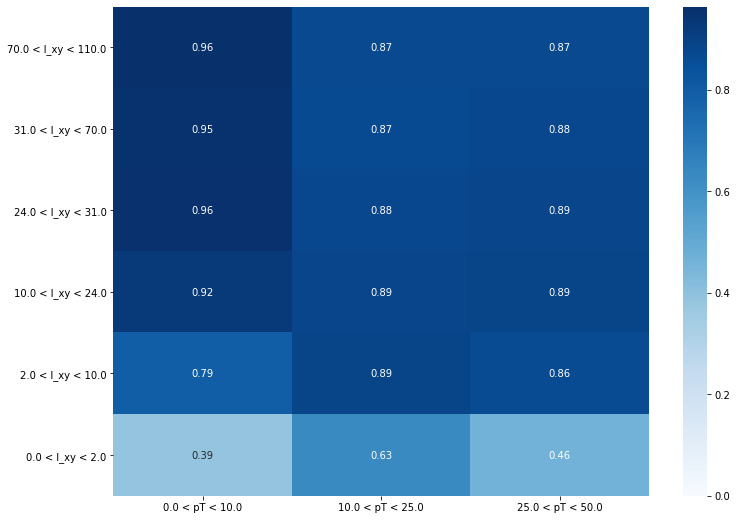

In [33]:
cms_plt.create_eff_plot_v2(lxy_edges, pT_edges, eff_mid_mass, 1, save=True, name="../images/add_fig_24.png")

In [34]:
paper_fig24 = np.array([[0.85, 0.83, 0.81],
                       [0.82, 0.81, 0.81],
                        [0.75, 0.76, 0.76],
                        [0.81, 0.8, 0.84],
                        [0.59, 0.7, 0.83],
                         [0.36, 0.45, 0.45],
                       ])
diff_mid_mass = eff_mid_mass-paper_fig24

### Difference between my results and the paper

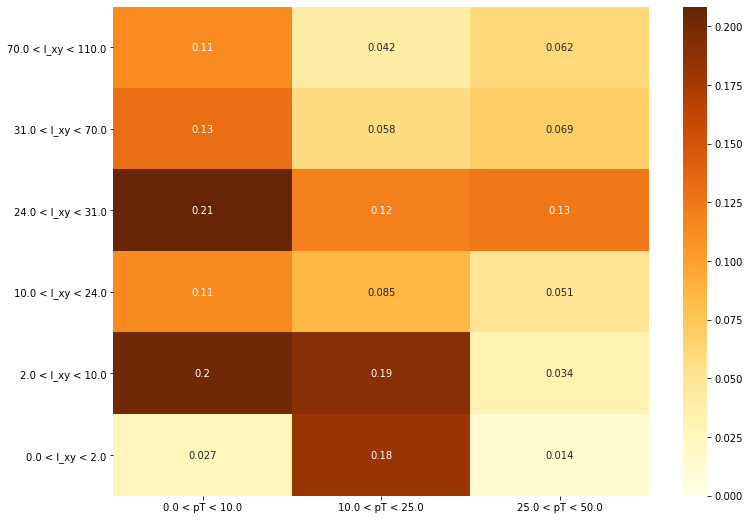

In [35]:
cms_plt.create_eff_plot_v2(lxy_edges, pT_edges, diff_mid_mass, 2, save=True, name="../images/add_fig_24-diff.png")